In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.calibration import CalibratedClassifierCV
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the dataset
data = pd.read_csv(r"C:\Users\Dell\Downloads\depressionurture.csv")

data.head()

,Do you feel bored or uninterested in activities?,Do you feel sad or hurt?,Do you stay up late at night?,Do you feel tired all the time?,Do you feel like there is nobody to help you?,Do you feel your parents are upset with you?,Do you leave food because you are not hungry?,Do you feel distracted while studying?,Do you feel like disappearing from the world?,Depression Risk
0,1,2,0,3,1,2,0,3,2,Moderate Risk
1,1,2,1,2,1,2,3,1,0,Moderate Risk
2,2,3,3,1,2,2,1,2,3,Moderate to Severe Risk
3,0,1,2,3,0,1,2,3,1,Moderate Risk
4,1,2,3,0,1,2,0,2,3,Moderate Risk


In [3]:
# Extracting categorical columns
categorical_cols = ['Do you feel bored or uninterested in activities?',
                    'Do you feel sad or hurt?',
                    'Do you stay up late at night?',
                    'Do you feel tired all the time?',
                    'Do you feel like there is nobody to help you?',
                    'Do you feel your parents are upset with you?',
                    'Do you leave food because you are not hungry?',
                    'Do you feel distracted while studying?',
                    'Do you feel like disappearing from the world?']

In [4]:
# One-hot encode categorical variables
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_data = encoder.fit_transform(data[categorical_cols])

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [5]:
# Create a DataFrame with encoded features
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Combine encoded features with numerical features
data_encoded = pd.concat([encoded_df, data.drop(columns=categorical_cols)], axis=1)

In [6]:
# Check for NaN values in the entire DataFrame
if data_encoded.isnull().values.any():
    # Convert all columns to numeric
    data_encoded = data_encoded.apply(pd.to_numeric, errors='coerce')
    
    # Fill NaN values with 0 in the entire DataFrame
    data_encoded.fillna(0, inplace=True)

In [7]:
# Separate features (X) and target variable (y)
X = data_encoded.drop(columns=['Depression Risk'])
y = data_encoded['Depression Risk']

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Initialize SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

In [10]:
# Train the SVM model
svm_classifier.fit(X_train, y_train)

SVC(random_state=42)

In [11]:
# Cross-validation scores
cv_scores = cross_val_score(svm_classifier, X, y, cv=5)

In [12]:
# Feature selection using SelectKBest
selector = SelectKBest(k=5)
X_selected = selector.fit_transform(X, y)

In [13]:
# Calibrate classifier for probability estimates
calibrated_svc = CalibratedClassifierCV(svm_classifier, cv='prefit')

# Make predictions on the test set using calibrated classifier
calibrated_svc.fit(X_train, y_train)
y_pred = calibrated_svc.predict(X_test)

In [14]:
# Evaluate the model
print("\nSVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))


SVM Confusion Matrix:
[[137  13  15   0   0]
 [  0  53   0   0   0]
 [  2   0 514  10   0]
 [  0   0  20 328   1]
 [  0   0   0  14  69]]

SVM Classification Report:
                         precision    recall  f1-score   support

              Mild Risk       0.99      0.83      0.90       165
           Minimal Risk       0.80      1.00      0.89        53
          Moderate Risk       0.94      0.98      0.96       526
Moderate to Severe Risk       0.93      0.94      0.94       349
            Severe Risk       0.99      0.83      0.90        83

               accuracy                           0.94      1176
              macro avg       0.93      0.92      0.92      1176
           weighted avg       0.94      0.94      0.94      1176



In [15]:
# Save the trained SVM classifier model
joblib.dump(calibrated_svc, 'svm_model.pkl')

['svm_model.pkl']

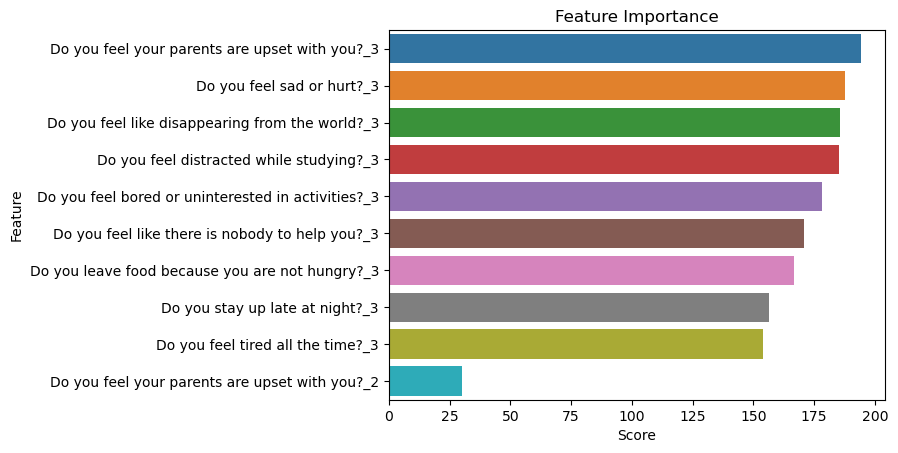


Cross-validation Scores: [0.91241497 0.90136054 0.92255319 0.93531915 0.93702128]


In [16]:
# Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_importance = feature_importance.sort_values(by='Score', ascending=False).head(10)
sns.barplot(x='Score', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

# Cross-validation scores
print("\nCross-validation Scores:", cv_scores)

Testing

In [17]:
import pandas as pd
import joblib

# Load the saved SVM model
loaded_svm_model = joblib.load('svm_model.pkl')

# Load the saved OneHotEncoder
loaded_encoder = joblib.load('one_hot_encoder.pkl')

In [18]:
# Prepare the input data
input_data = pd.DataFrame({
    'Do you feel bored or uninterested in activities?': [3],
    'Do you feel sad or hurt?': [1],
    'Do you stay up late at night?': [0],
    'Do you feel tired all the time?': [1],
    'Do you feel like there is nobody to help you?': [0],
    'Do you feel your parents are upset with you?': [0],
    'Do you leave food because you are not hungry?': [2],
    'Do you feel distracted while studying?': [1],
    'Do you feel like disappearing from the world?': [0]
})

# One-hot encode the input data
encoded_input = loaded_encoder.transform(input_data)

# Make predictions
predictions = loaded_svm_model.predict(encoded_input)

print("Predictions:", predictions)

Predictions: ['Mild Risk']


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
